In [60]:
import csv
import seaborn as sns
import pandas as pd
import matplotlib
from sklearn import preprocessing

matplotlib.rcParams['figure.figsize'] = (20, 10)

# Résolution d'un système

In [9]:
header=('n_threads', 'matrix_size', 'n_steps', 'time')
df = pd.read_csv('results/results_parallel_single_system.csv', names=header)
df

,n_threads,matrix_size,n_steps,time
0,1,128,100,942
1,1,256,100,4225
2,1,512,100,17945
3,1,1024,100,71688
4,1,2048,100,299272
...,...,...,...,...
1995,16,128,50000,551864
1996,16,256,50000,678153
1997,16,512,50000,1381027
1998,16,1024,50000,4119074


## Passage à l'échelle fort

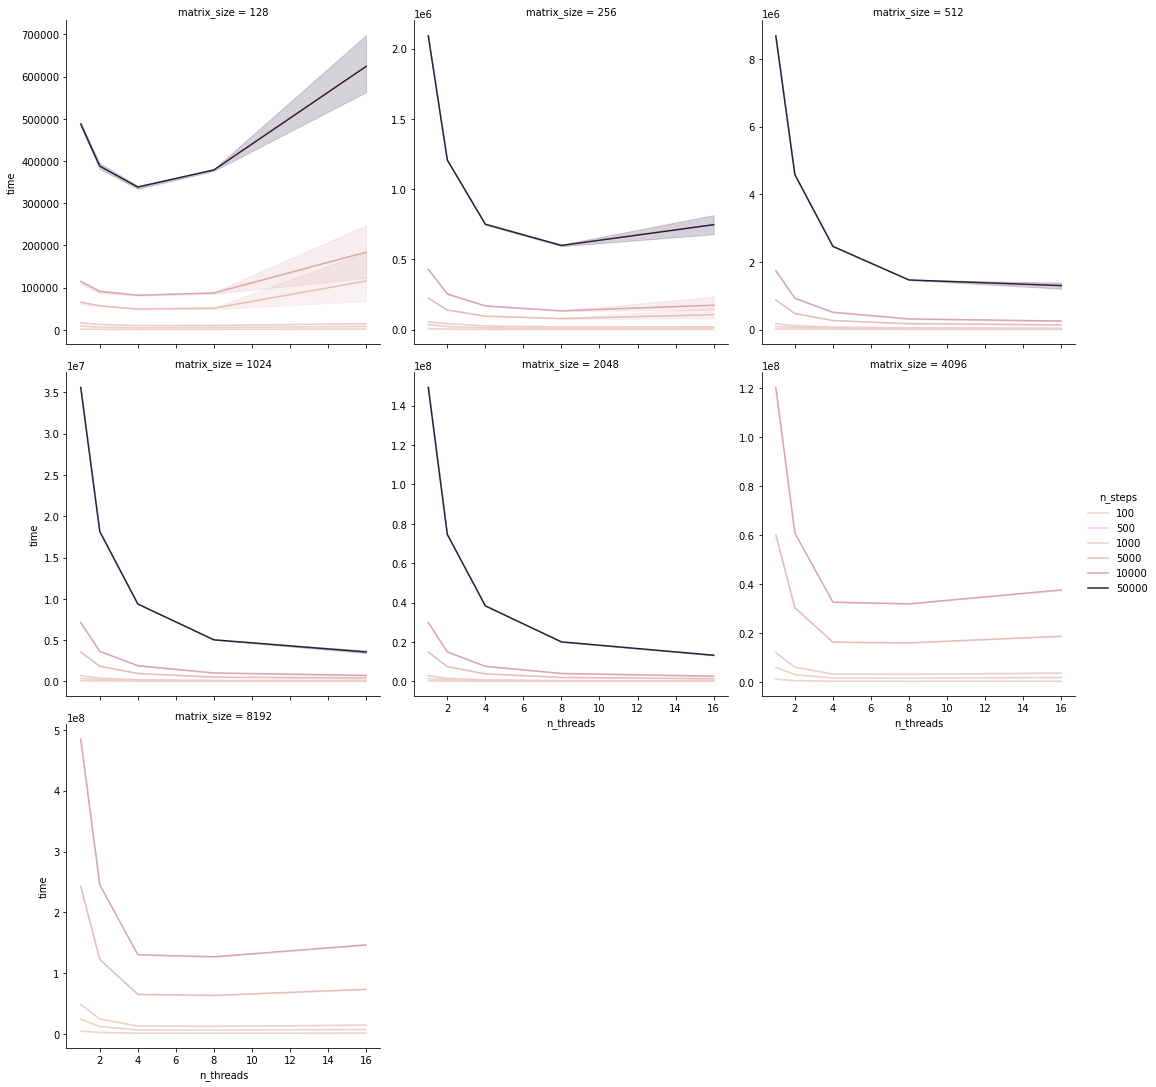

In [80]:
sns.relplot(data=df, x="n_threads", y="time", hue="n_steps", col="matrix_size", col_wrap=3, kind="line", facet_kws={'sharey': False})

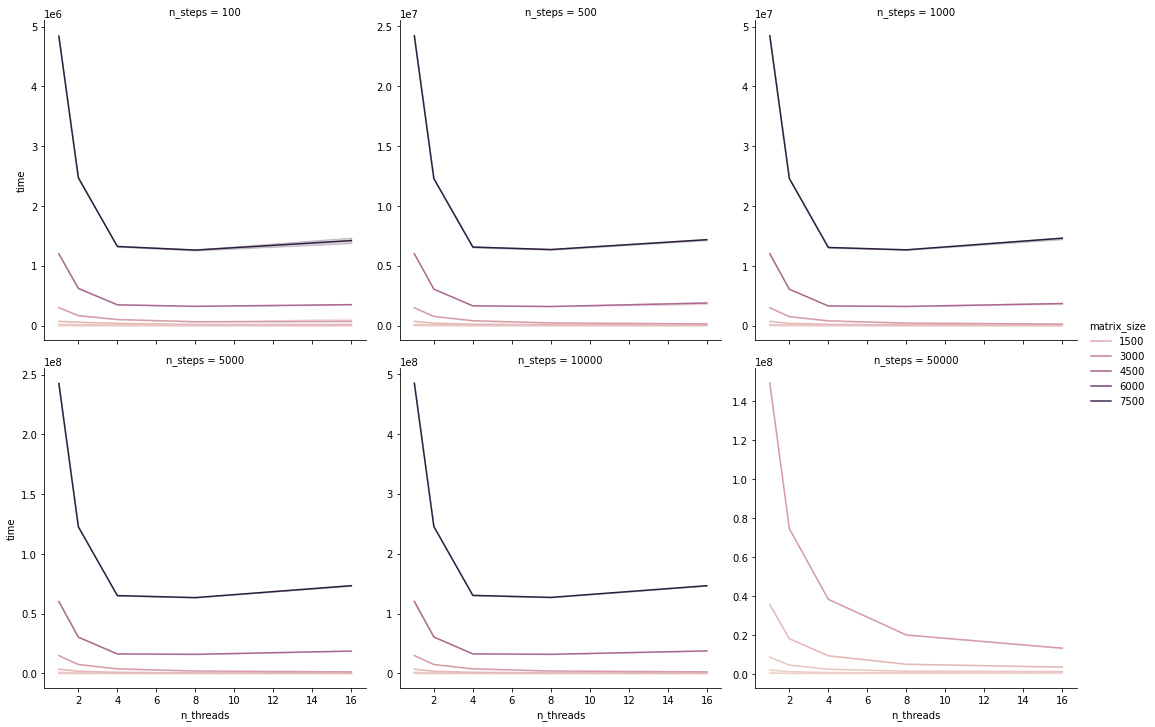

In [81]:
sns.relplot(data=df, x="n_threads", y="time", hue="matrix_size", col="n_steps", col_wrap=3, kind="line", facet_kws={'sharey': False})

## Passage à l'échelle faible